<a href="https://colab.research.google.com/github/viralijoshi/machine-learning/blob/main/feature_engineering1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv("/content/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#pandas profile give direct some data analysis in one html form which gives many values like bivariate univariate analysis and simple statstic

# feature engineering

feature engineering include 4 things


---
[1]**feature transfromation**


*   missing value handle
*   handle categorical data
*   handle outliers
*   feature scaling





[2]**feature cosruction**


[3]feature selection

[4]feature extraction



# **feature sacling standardization**

it is the technique to standardized the independant features which are present in data

there are two types of feature scaling


*   standardization [zscore] after standardization the mean of the coloumn is 0 and standard  deviation is 1
*   normalization



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1=pd.DataFrame(df[['Age','Fare','Pclass']])
df1.head()
df1=df1.dropna()
df1.isna().sum()

,0
Age,0
Fare,0
Pclass,0


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1.drop('Pclass',axis=1),df1['Pclass'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((231, 2), (100, 2))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
scaler.mean_

array([29.37337662, 35.59491385])

In [9]:
#x_train_scaled

In [10]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=['Age','Fare'])
x_test_scaled=pd.DataFrame(x_test_scaled,columns=['Age','Fare'])
x_train_scaled.head()

,Age,Fare
0,2.511062,0.988779
1,-1.985069,-0.261831
2,-1.912551,-0.453607
3,-0.824777,0.507349
4,-0.462186,-0.451008


In [11]:
np.round(x_train.describe(),1)

,Age,Fare
count,231.0,231.0
mean,29.4,35.6
std,13.8,48.2
min,0.8,0.0
25%,21.0,8.0
50%,27.0,15.2
75%,36.0,36.9
max,67.0,263.0


In [12]:
np.round(x_train_scaled.describe(),1) #here we can see that mean is zero and std is 1 after scalling

,Age,Fare
count,231.0,231.0
mean,0.0,0.0
std,1.0,1.0
min,-2.1,-0.7
25%,-0.6,-0.6
50%,-0.2,-0.4
75%,0.5,0.0
max,2.7,4.7


Text(0.5, 1.0, 'After Scaling')

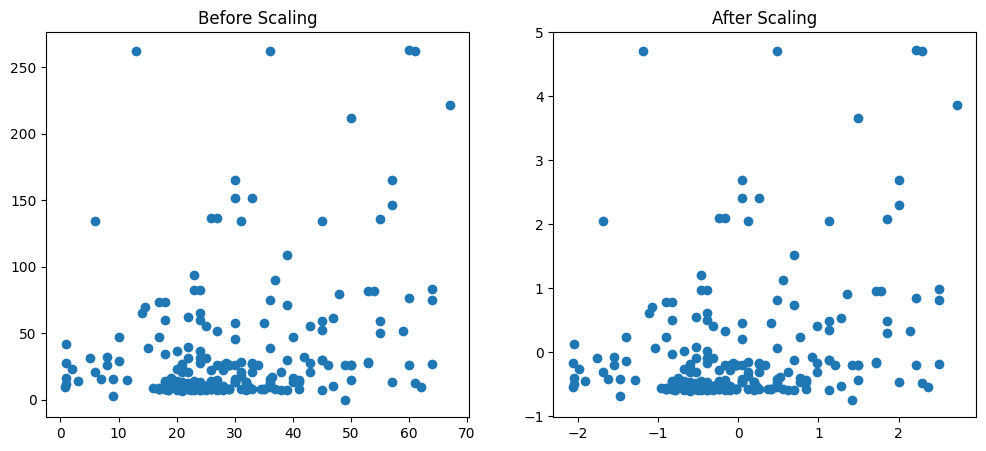

In [13]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['Fare'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['Fare'])
ax2.set_title('After Scaling')

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

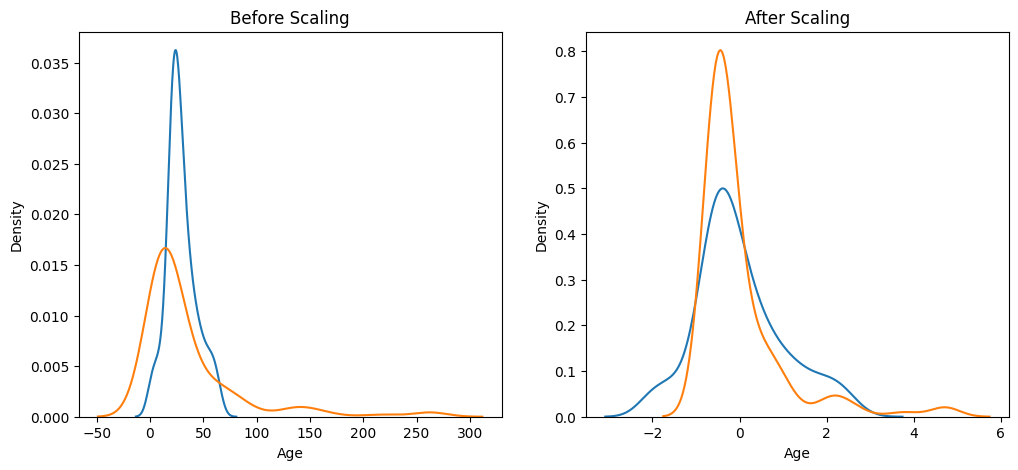

In [14]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['Fare'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['Fare'],ax=ax2)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
df1[['Age', 'Fare']] = imputer.fit_transform(df1[['Age', 'Fare']]) # Impute missing values in 'Age' and 'Fare'

lr=LogisticRegression()
lr_scaled=LogisticRegression()

lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [16]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_scaled)

(0.76, 0.77)

standardation does not effect on the decion tree algorithm


# **normalization feature scalling**

the goal of normalization is to chnage the numerical value in dataset in particulaar(common) sacle


*  min-max scalling
*  min normalization
*  max absolute scalling
*  robust scalling



[1]. min-max scalling
Xi'= [Xi-Xmean]/[Xmax-Xmin]


















In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("/content/wine-clustering.csv",usecols=[0,1,2])
df.head()

,Alcohol,Malic_Acid,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Ash',axis=1),df['Ash'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=['Alcohol','Malic_Acid'])
x_test_scaled=pd.DataFrame(x_test_scaled,columns=['Alcohol','Malic_Acid'])
x_train_scaled.head()

,Alcohol,Malic_Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [23]:
np.round(x_train.describe(),2)

,Alcohol,Malic_Acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [24]:
np.round(x_train_scaled.describe(),2) #here we can see that min zero and max values are become 1 after min-max scalling

,Alcohol,Malic_Acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


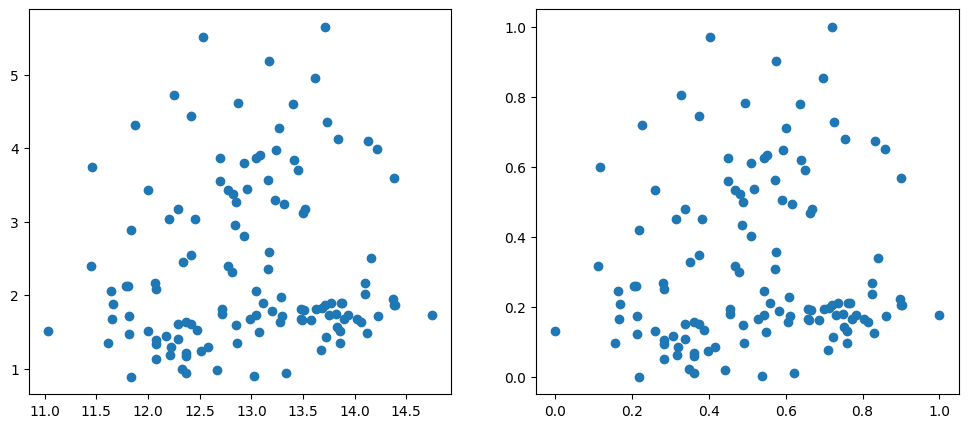

In [25]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic_Acid'])

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic_Acid'])



<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

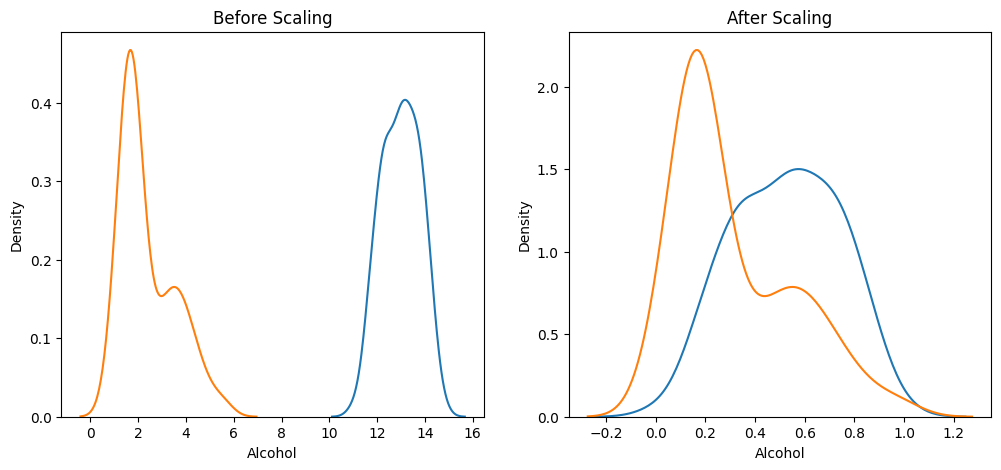

In [26]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic_Acid'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic_Acid'],ax=ax2)

**mean monrmalization** {if you have numerical data and you want to perform this normalization the formula is

Xi'=[Xi-Xmean] / [Xmax - Xmin]

mean centrilaization  #rarely used and not available on sklearn as class


**max absolut scalling**

formula : Xi' = Xi/|Xmax|


**robust scalling**

formula : Xi'= [Xi - Xmedian] / IQR{75th-25th}

it is robust to outliers work good whene your data have lots of outliers

**# encoding categorical data**

ordinal encoding   [label encoder use to output coloumn]

one hot encoding

In [27]:
df=pd.read_csv("/content/customer.csv")
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [28]:
df=df.iloc[:,2:] #in actual dataframe review and education contain ordinal data so we only take that data and perform ordinal encoding on it
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)
x_train.shape,x_test.shape

((40, 2), (10, 2))

In [30]:
x_train.head()

,review,education
5,Average,School
4,Average,UG
19,Poor,PG
11,Good,UG
36,Good,UG


In [31]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
oe.fit(x_train)
x_train=oe.transform(x_train)
x_test=oe.transform(x_test)

In [32]:
x_train

array([[1., 0.],
       [1., 1.],
       [0., 2.],
       [2., 1.],
       [2., 1.],
       [0., 2.],
       [2., 2.],
       [2., 0.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [0., 2.],
       [2., 2.],
       [0., 1.],
       [1., 1.],
       [2., 0.],
       [1., 1.],
       [2., 0.],
       [1., 0.],
       [2., 2.],
       [2., 0.],
       [0., 2.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [2., 0.],
       [1., 0.],
       [1., 2.],
       [0., 0.],
       [2., 1.],
       [0., 2.],
       [2., 0.],
       [0., 2.],
       [1., 0.],
       [0., 1.],
       [2., 1.],
       [0., 2.],
       [0., 1.],
       [0., 2.],
       [2., 2.]])

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [34]:
y_train

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

# **one hot encoding**

In [35]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [36]:
df['owner'].value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


**implementing one hot encoding**

In [37]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True) #inour dataframe there ie 3 nominal coloumn but brand has large values so we lastly consider and here cosider only 2 coloumn

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [39]:
x_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',dtype=np.int32) #here you can not give the value in true false as per the functions rules you need to give the values in binnary or first
x_trainnew=ohe.fit_transform(x_train[['fuel','owner']]).toarray()
x_testnew=ohe.fit_transform(x_test[['fuel','owner']]).toarray()

In [41]:
x_trainnew

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [42]:
np.hstack((x_train[['brand','km_driven']].values,x_trainnew))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [43]:
df['brand'].value_counts()

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [44]:
counts=df['brand'].value_counts()
thresold=100
repl= counts[counts<=thresold].index
pd.get_dummies(df['brand'].replace(repl,'others'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,others
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False


**coloumn transformer**

In [45]:
from sklearn.compose import ColumnTransformer

In [46]:
#transformer=ColumnTransformer#(transformers=[
#('tf1',OneHotEncoder(drop='first',dtype=np.int32),['fuel','owner']),
#('tf2',OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']]),['review','education'])
#,],remainder='passthrough')



In [47]:
#transformer.fit_transform(x_train) this is a example of transformer not for exact data only the syntax made up of the upper dataests and coloumn so do not consider it for output just leanr the syntax for coloumn transformer

# **pipelining in machine learning**

pipline is a mechnisum in ml which chain the multiple steps

its makes it easy to apply same prosecing to train and test

**titanic without using pipeline**

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [49]:
df=pd.read_csv('/content/train.csv')

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [52]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True, errors='ignore') # Adding errors='ignore'
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [53]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

In [54]:
x_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [55]:
y_train.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [56]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [57]:
#by analyzing upper code we have null values in age and embarkes so first we have to remove it by imputer
si_age=SimpleImputer()
si_embarked=SimpleImputer(strategy='most_frequent')

x_train_age=si_age.fit_transform(x_train[['Age']])
x_train_embarked=si_embarked.fit_transform(x_train[['Embarked']])

x_test_age=si_age.transform(x_test[['Age']])
x_test_embarked=si_embarked.transform(x_test[['Embarked']])

In [58]:
x_train_age

array([[45.5       ],
       [23.        ],
       [32.        ],
       [26.        ],
       [ 6.        ],
       [24.        ],
       [45.        ],
       [29.        ],
       [29.49884615],
       [29.49884615],
       [42.        ],
       [36.        ],
       [33.        ],
       [17.        ],
       [29.        ],
       [50.        ],
       [35.        ],
       [38.        ],
       [34.        ],
       [17.        ],
       [11.        ],
       [61.        ],
       [30.        ],
       [ 7.        ],
       [63.        ],
       [20.        ],
       [29.49884615],
       [29.        ],
       [36.        ],
       [29.49884615],
       [50.        ],
       [27.        ],
       [30.        ],
       [33.        ],
       [29.49884615],
       [29.49884615],
       [ 2.        ],
       [25.        ],
       [51.        ],
       [25.        ],
       [29.49884615],
       [29.49884615],
       [24.        ],
       [18.        ],
       [29.49884615],
       [25

In [59]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [60]:
x_train_embarked

array([['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe_sex=OneHotEncoder(handle_unknown='ignore')
ohe_embarked=OneHotEncoder(handle_unknown='ignore')

x_train_sex=ohe_sex.fit_transform(x_train[['Sex']])
x_train_embarked=ohe_embarked.fit_transform(x_train_embarked)

x_test_sex=ohe_sex.transform(x_test[['Sex']])
x_test_embarked=ohe_embarked.transform(x_test_embarked)

In [67]:
x_train_embarked = np.array(x_train_embarked.todense())
x_test_embarked = np.array(x_test_embarked.todense())

In [68]:
x_train_embarked


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [69]:
x_train_remain=x_train.drop(columns=['Sex','Age','Embarked'])
x_test_remain=x_test.drop(columns=['Sex','Age','Embarked'])

In [71]:
x_train_transformed=np.concatenate((x_train_remain.values,x_train_age,x_train_sex.toarray(),x_train_embarked),axis=1) # convert x_train_remain and x_train_sex to NumPy arrays
x_test_transformed=np.concatenate((x_test_remain.values,x_test_age,x_test_sex.toarray(),x_test_embarked),axis=1) # convert x_test_remain and x_test_sex to NumPy arrays

In [72]:
x_test_transformed.shape

(179, 10)

In [73]:
clf=DecisionTreeClassifier()
clf.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [74]:
y_pred=clf.predict(x_test_transformed)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7877094972067039

In [79]:
import pickle
import os
os.makedirs('models',exist_ok=True)

In [84]:
pickle.dump(ohe_sex,open('models/ohe_sex.pkl','wb'))
pickle.dump(ohe_embarked,open('models/ohe_embarked.pkl','wb'))
pickle.dump(clf,open('models/clf.pkl','wb'))


In [85]:
import numpy as np

In [86]:
ohe_sex=pickle.load(open('models/ohe_sex.pkl','rb'))
ohe_embarked=pickle.load(open('models/ohe_embarked.pkl','rb'))
clf=pickle.load(open('models/clf.pkl','rb'))

In [87]:
test_input=np.array([2,'male',31.0,0,0,10.5,'S'],dtype=object).reshape(1,7)

In [88]:
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [92]:
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [93]:
test_input_sex

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 2)>

In [94]:
test_input_embarked=ohe_embarked.transform(test_input[:,-1].reshape(1,1))

In [95]:
test_input_embarked

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 3)>

In [97]:
#here we see that the new coloumn has to di all perfomance as we done in past
#when we do not use pipeline we need to use same series that we used in train on test data

# with pipline

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [100]:
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True,errors='ignore')

In [103]:
x_tran,x_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

In [104]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [106]:
y_train.sample(5)

,Survived
336,0
699,0
264,0
690,1
52,1


In [107]:
#imputation tranformer
trf1=ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [117]:
#one hot encoding
trf2=ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6]) # Changed 'spares_output' to 'sparse_output'
],remainder='passthrough')

In [119]:
#scaling
trf3=ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [120]:
#feature selection
trf4=SelectKBest(score_func=chi2,k=8)


In [121]:
#train model
trf5=DecisionTreeClassifier()

**create pipeline**

In [122]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

**pipeline vs make_pipeline**

pipeline requierd naming of steps , make_pipeline does not

In [123]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7a315899e7a0>)),
                ('trf5', DecisionTreeClassifier())])

In [124]:
y_pred=pipe.predict(x_test)

In [125]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0])

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  #less because feature selections added

0.6256983240223464

**cross validation**

In [127]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.6391214419383433)

**gridsearch using pipeline**

In [129]:
params={
    'trf5__max_depth':[1,2,3,4,5,None]

}

In [130]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipe,params,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7a315899e7a0>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [131]:
grid.best_score_

np.float64(0.6391214419383433)

In [132]:
grid.best_params_

{'trf5__max_depth': 2}